In [49]:
import os

In [50]:
path = "D:\FYP\Datasets\dataset1\segmented-oxy-deoxy"
file_list = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]
print(len(file_list))

1088


In [51]:
out=[]
#oxy_files,deoxy_files=[],[]
for name in file_list:
    out.append(int(name[-5]))

In [52]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from os import listdir

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

from keras.layers import Dense
from keras.layers import Dropout

from keras.layers import BatchNormalization



In [53]:
sequences = list()
for i in file_list:
    file_path = path + '\\'+i
    #print(file_path)
    df = pd.read_csv(file_path, header=0)
    df=df.drop(['Unnamed: 0'],axis=1)
    values = df.values
    sequences.append(values)

In [54]:
len_sequences = []
for one_seq in sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe()

count    1088.000000
mean      425.937500
std         0.242173
min       425.000000
25%       426.000000
50%       426.000000
75%       426.000000
max       426.000000
dtype: float64

In [55]:
new_sequences=[]
for i in range(len(sequences)):
    new_sequences.append(sequences[i][:425])


len_sequences = []
for one_seq in new_sequences:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).describe()

count    1088.0
mean      425.0
std         0.0
min       425.0
25%       425.0
50%       425.0
75%       425.0
max       425.0
dtype: float64

In [56]:
y=[]
for i in range(len(out)):
    if out[i]==0:
        y.append(0)
    else:
        y.append(1)

In [57]:
y=np.array(y)
pd.Series(y).describe()

count    1088.000000
mean        0.750000
std         0.433212
min         0.000000
25%         0.750000
50%         1.000000
75%         1.000000
max         1.000000
dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
new_sequences=np.array(new_sequences)
deoxy_out=np.array(out)
X_train, X_test, y_train, y_test = train_test_split(new_sequences, y, test_size = 0.2, random_state = 0)

In [59]:
def hbrdmdl():
    model = Sequential()
    model.add(Dense(100, input_dim=1700, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(.3))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [60]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [61]:
from scipy import stats

stat, pvalue = stats.shapiro(X_train[400])

# Print the results
print("Shapiro-Wilk test statistic:", stat)
print("p-value:", pvalue)
if pvalue > 0.05:
    print("The data appears to be normally distributed.")
else:
    print("The data does not appear to be normally distributed.")


Shapiro-Wilk test statistic: 0.9028301239013672
p-value: 1.4719844714033547e-31
The data does not appear to be normally distributed.


(array([[  0.,  92., 104., 167.,  52.,   5.,   5.,   0.,   0.,   0.],
        [  0.,  92.,  61., 272.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,  53., 219., 118.,  10.,   7.,   5.,   5.,   4.,   4.],
        [ 13.,  19., 125., 268.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([-0.63598606, -0.42452312, -0.21306017, -0.00159722,  0.20986572,
         0.42132867,  0.63279161,  0.84425456,  1.05571751,  1.26718045,
         1.4786434 ]),
 <a list of 4 BarContainer objects>)

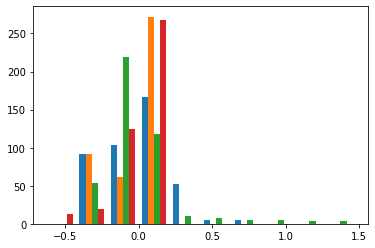

In [62]:
plt.hist(X_train[100])

In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(870, 425, 4)
(218, 425, 4)
(870,)
(218,)


In [64]:
X_train = X_train.reshape(870, -1)  # -1 infers the number of elements from the remaining dimensions

# Print the original and reshaped array shapes for verification
print(f"Original array shape: {X_train.shape}")
#print(f"Reshaped array shape: {x_train_reshaped.shape}")

Original array shape: (870, 1700)


(array([ 13., 256., 509., 825.,  62.,  12.,  10.,   5.,   4.,   4.]),
 array([-0.63598606, -0.42452312, -0.21306017, -0.00159722,  0.20986572,
         0.42132867,  0.63279161,  0.84425456,  1.05571751,  1.26718045,
         1.4786434 ]),
 <BarContainer object of 10 artists>)

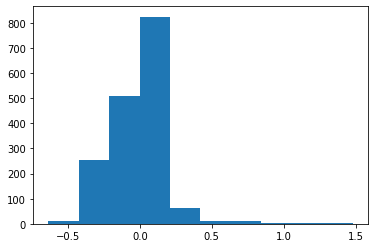

In [65]:
plt.hist(X_train[100])

In [66]:
min_vals = X_train.min(axis=0)
max_vals = X_train.max(axis=0)
X_train = (X_train - min_vals) / (max_vals - min_vals)

In [69]:

graph_model = hbrdmdl()
history=graph_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_split = .15, verbose = 1)

#scores = graph_model.evaluate(X_test, y_test)
#print("\n%s: %.2f%%" % (graph_model.metrics_names[1], scores[1]*100))

Epoch 1/60
24/24 [==============================] - 3s 22ms/step - loss: 0.7853 - accuracy: 0.5602 - val_loss: 0.6828 - val_accuracy: 0.7023
Epoch 2/60
24/24 [==============================] - 0s 7ms/step - loss: 0.6647 - accuracy: 0.6252 - val_loss: 0.6737 - val_accuracy: 0.6870
Epoch 3/60
24/24 [==============================] - 0s 7ms/step - loss: 0.6424 - accuracy: 0.6563 - val_loss: 0.6684 - val_accuracy: 0.7023
Epoch 4/60
24/24 [==============================] - 0s 7ms/step - loss: 0.6049 - accuracy: 0.6861 - val_loss: 0.6623 - val_accuracy: 0.7099
Epoch 5/60
24/24 [==============================] - 0s 7ms/step - loss: 0.6086 - accuracy: 0.7064 - val_loss: 0.6645 - val_accuracy: 0.6947
Epoch 6/60
24/24 [==============================] - 0s 7ms/step - loss: 0.5525 - accuracy: 0.7267 - val_loss: 0.6426 - val_accuracy: 0.7176
Epoch 7/60
24/24 [==============================] - 0s 8ms/step - loss: 0.5644 - accuracy: 0.7226 - val_loss: 0.6238 - val_accuracy: 0.7023
Epoch 8/60
24/24 [=

In [70]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(train_acc)
print(val_acc)

[0.56021648645401, 0.6251691579818726, 0.6562922596931458, 0.686062216758728, 0.7063599228858948, 0.7266576290130615, 0.7225980758666992, 0.717185378074646, 0.7239512801170349, 0.7401894330978394, 0.742895781993866, 0.7699593901634216, 0.7320703864097595, 0.7131258249282837, 0.7320703864097595, 0.7564275860786438, 0.7564275860786438, 0.7537212371826172, 0.7550744414329529, 0.767253041267395, 0.7550744414329529, 0.7523680925369263, 0.742895781993866, 0.7645466923713684, 0.7510148882865906, 0.7699593901634216, 0.7604871392250061, 0.7726657390594482, 0.7713125944137573, 0.7618403434753418, 0.7713125944137573, 0.7631934881210327, 0.7780784964561462, 0.7645466923713684, 0.7780784964561462, 0.7510148882865906, 0.7537212371826172, 0.7604871392250061, 0.7510148882865906, 0.7740189433097839, 0.7753721475601196, 0.7834911942481995, 0.7604871392250061, 0.7767252922058105, 0.7807848453521729, 0.7713125944137573, 0.7658998370170593, 0.7713125944137573, 0.7794316411018372, 0.7564275860786438, 0.7577

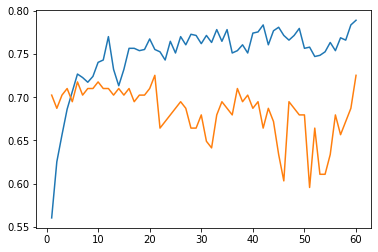

In [73]:
x_axis=list(range(1,61))
plt.plot(x_axis,train_acc)
plt.plot(x_axis,val_acc)
#plt.legend('train_acc','val_acc')

In [41]:
print(X_train.shape)
print(y_train.shape)

(870, 1700)
(870,)


In [106]:
model = tf.keras.Sequential([
tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(None, 128, 1), padding='same'),
tf.keras.layers.Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(None, 64, 1), padding='same'),
tf.keras.layers.Conv1D(filters=32, kernel_size=11, activation='relu', input_shape=(None, 32, 1), padding='same'),
tf.keras.layers.Dropout(rate=0.5),
tf.keras.layers.ReLU(),
tf.keras.layers.Flatten(),
tf.keras.layers.Reshape((-1, 32 * 2)),
tf.keras.layers.MaxPool1D(pool_size=(2)),
tf.keras.layers.Dense(units=64, activation="relu"),
tf.keras.layers.Dense(units=1, activation="sigmoid")

])
print(model.output_shape)

(None, None, 1)


In [109]:
print(X_train.shape)

(870, 1700)


In [110]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=60, batch_size=32)

Epoch 1/60


ValueError: in user code:

    File "c:\Python310\cv\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Python310\cv\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python310\cv\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Python310\cv\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "c:\Python310\cv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python310\cv\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_31" (type Sequential).
    
    Input 0 of layer "conv1d_17" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 1700)
    
    Call arguments received by layer "sequential_31" (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1700), dtype=float32)
      • training=True
      • mask=None


In [75]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import keras_tuner as kt

In [104]:
model = tf.keras.Sequential([
  tf.keras.Input(shape=(1700, 1)),
  tf.keras.layers.Conv1D(1,3, activation='relu'),
  tf.keras.layers.MaxPooling1D(pool_size=(2), strides=(2)),
  tf.keras.layers.Conv1D(1,3, activation='relu'),
  tf.keras.layers.Dense(units=64, activation='relu'),
  tf.keras.layers.Dense((2))])
 

print(model.output_shape)

(None, 847, 2)


In [88]:
import tensorflow as tf

model = tf.keras.Sequential([
  tf.keras.Input(shape=(425, 4, 1)),
  tf.keras.layers.Conv2D(1, (3, 3), activation='relu'),
  # Adjust pooling layer if necessary (e.g., pool_size=(1, 1), strides=(1, 1))
  tf.keras.layers.MaxPooling2D(pool_size=(1, 1), strides=(1, 1)),  # Potential adjustment point
  tf.keras.layers.Conv2D(1, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),  # Flatten without invalid arguments
  tf.keras.layers.Dense(units=64, activation='relu'),  # Specify output size for Dense layer
  tf.keras.layers.Dense(units=10)  # Example output size (adjust as needed)
])

# Compile the model (optimizer, loss function, metrics


ValueError: Exception encountered when calling layer "conv2d_20" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_20/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_20/Conv2D/ReadVariableOp)' with input shapes: [?,423,2,1], [3,3,1,1].

Call arguments received by layer "conv2d_20" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 423, 2, 1), dtype=float32)

In [86]:

model = models.Sequential()
model.add(layers.Input(shape=(425, 4, 1)))
model.add(layers.Conv2D(1,(3, 3), activation='relu'))
#model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(1,(3, 3), activation='relu'))

model.add(layers.Flatten(64, (3, 3), activation='relu'))

model.add(layers.Dense())
model.add(layers.Dense())

print(model.output_shape)

ValueError: Exception encountered when calling layer "conv2d_16" (type Conv2D).

Negative dimension size caused by subtracting 3 from 2 for '{{node conv2d_16/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Placeholder, conv2d_16/Conv2D/ReadVariableOp)' with input shapes: [?,423,2,1], [3,3,1,1].

Call arguments received by layer "conv2d_16" (type Conv2D):
  • inputs=tf.Tensor(shape=(None, 423, 2, 1), dtype=float32)

In [78]:
model_builder

<function __main__.model_builder()>

In [43]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 425, 4)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout((2, 2)))
model.add(layers.Flatten(64, (3, 3), activation='relu'))
model.add(layers.Dropout((2, 2)))
model.add(layers.Dense((2, 2)))
model.add(layers.Dense((2, 2)))

TypeError: Flatten.__init__() takes from 1 to 2 positional arguments but 3 were given

In [ ]:
model = keras.models.load_model(r"C:\Users\ASUS\Downloads\model-dense.h5")
model.predict(X_train[0])


ValueError: in user code:

    File "c:\Python310\cv\lib\site-packages\keras\engine\training.py", line 1845, in predict_function  *
        return step_function(self, iterator)
    File "c:\Python310\cv\lib\site-packages\keras\engine\training.py", line 1834, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python310\cv\lib\site-packages\keras\engine\training.py", line 1823, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Python310\cv\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
        return self(x, training=False)
    File "c:\Python310\cv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python310\cv\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "model" (type Functional).
    
    Input 0 of layer "dense" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "model" (type Functional):
      • inputs=tf.Tensor(shape=(None,), dtype=float32)
      • training=False
      • mask=None


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 39)]              0         
                                                                 
 dense (Dense)               (None, 128)               5120      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________
